In [13]:
from sympy import solve, nroots, I
from sympy.abc import x
from sympy import diff
from sympy import re, im
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt
import numpy as np
import random
import itertools
from scipy.spatial import distance
import math



In [14]:
def polyRoots(poly, variable=x):
    p = Poly(poly, x)
    coeffs = list(map(complex, p.all_coeffs()))
    coeffs.reverse()
    roots = polynomial.polyroots(coeffs)
    xs = []
    ys = []
    for i, root in enumerate(roots):
        xs.append(root.real)
        ys.append(root.imag)

    return xs, ys

In [15]:

def plotPolyAndDerviative(poly):
    if solve(poly, x) != [0]:
        roots = nroots(poly)
    else:
        roots = [0 + I * 0]
    if solve(diff(poly), x) != [0]:
        derivativeRoots = nroots(diff(poly))
    else:
        derivativeRoots = [0 + I * 0]
    
    xs = []
    ys = []
    points = []
    for i, root in enumerate(roots):
        xs.append(re(root))
        ys.append(im(root))
        points.append([re(root), im(root)])
    points = np.array(points)
    plt.scatter(xs, ys, label="Polynomial Root", marker="o", color="green")
    
    if len(points) > 2:
        hull = ConvexHull(points)
        for simplex in hull.simplices:
            plt.plot(points[simplex, 0], points[simplex, 1], 'k-', color="gray")
        
    dxs = []
    dys = []    
    for root in derivativeRoots:
        dxs.append(re(root))
        dys.append(im(root))    
    plt.scatter(dxs, dys, label="Derivative Root", marker="*", color="blue")
    
    plt.legend(loc="upper right")
    
    # makes the x-axis and y-axis scales equal
    plt.axis("scaled")

    # offset so that the legend doesn't overlap the figure
    bottomY, topY = plt.ylim()
    plt.ylim(bottomY - 1, topY + 1) 
    bottomX, topX = plt.xlim()
    plt.xlim(bottomX - 1, topX + 1) 
    
    plt.show()

In [16]:
def is_in_hull(point, hull, tolerance=1e-12):
    return all(
        (np.dot(eq[:-1], point) + eq[-1] <= tolerance)
        for eq in hull.equations)

In [21]:

# poly is the polynomial function
# degree is the number of points that will construct a convex hull
# limit is the max number of graph we want to see

# This function shows up to limit number of sub-convex hulls if there existed 
# and shows a message to indicate whether the convex hull contains any derivative root
def num_points_hull(poly, degree, limit):
    if (degree < 3):
        raise Exception("Cannot form a convex hull")

    if solve(poly, x) != [0]:
        roots = nroots(poly)
    else:
        roots = [0 + I * 0]
    if solve(diff(poly), x) != [0]:
        derivativeRoots = nroots(diff(poly))
    else:
        derivativeRoots = [0 + I * 0]
    
    xs = []
    ys = []
    points = []
    for i, root in enumerate(roots):
        xs.append(re(root))
        ys.append(im(root))
        points.append([re(root), im(root)])
    points = np.array(points)
    
    # plt.scatter(xs, ys, label="Polynomial Root", marker="*", color="green")
    dxs = []
    dys = []    
    deri_points = []
    for root in derivativeRoots:
        dxs.append(re(root))
        dys.append(im(root))  
        deri_points.append([re(root), im(root)])
    deri_points = np.array(deri_points)

    # Generate combination of all points with 'degree' elements
    points_comb = np.array(list(itertools.combinations(points, degree)))
    success = 0
    count = 0
    if (len(points_comb) < limit):
        limit = len(points_comb)
    while count < limit:
        fig = plt.figure()        
        selected = points_comb[count]
        
        highlight_x = []
        highlight_y = []
        for j in range(len(selected)):
            highlight_x.append(selected[j][0])
            highlight_y.append(selected[j][1])
            
    
        plt.scatter(xs, ys, label="Polynomial Root", marker="o", color="green")
        plt.scatter(highlight_x, highlight_y, marker="o", color="red")
        



        
        
#         hull = ConvexHull(selected)
#         for simplex in hull.simplices:
#             plt.plot(selected[simplex, 0], selected[simplex, 1], 'k-', color="gray")
        
        #Check if there is at least one derivative root inside the hull
#         hasPoint = False
#         for point in deri_points:
#             if (is_in_hull(point, hull)):
#                 hasPoint = True
#                 break
                
        count += 1
        plt.scatter(dxs, dys, label="Derivative Root", marker="*", color="blue")

        plt.legend(loc="upper right")
        
                # CENTROID CODE
        centroid = (sum(highlight_x) / len(highlight_x), sum(highlight_y) / len(highlight_y))
        centroid_points = zip(highlight_x, highlight_y)
        plt.scatter(centroid[0],centroid[1])
        
        dst_max = 0
        
        for point in centroid_points:
            dst = math.dist(centroid, point)
            if dst > dst_max:
                max_point = point
                dst_max = dst
            else:
                continue
        circle1 = plt.Circle((centroid), dst_max, color='r', fill=False)
        plt.gca().add_patch(circle1)
        
            #Centroid point check
        
        hasCentroidpoint = False
        for point in deri_points:
            if math.sqrt((point[0] - centroid[0]) ** 2 + (point[1] - centroid[1]) ** 2) <= dst_max:
                hasCentroidpoint = True
                success = success + 1
                break
            
            

        # makes the x-axis and y-axis scales equal
        plt.axis("scaled")

        # offset so that the legend doesn't overlap the figure
        bottomY, topY = plt.ylim()
        plt.ylim(bottomY - 1, topY + 1) 
        bottomX, topX = plt.xlim()
        plt.xlim(bottomX - 1, topX + 1) 
        plt.title("Graph" + str(count))
        plt.show()
#         if (hasPoint):
#             print("There is at least one derivative root in the sub-convex hull")
#         else:
#             print("There is no derivative root in the sub-convex hull")
            
        if (hasCentroidpoint):
            print("There is at least one derivative root in the centroid circle")
        else:
            print("There is no derivative root in the centroid circle")
    
    print("Success rate = "+ str((success/count)*100) + "%")

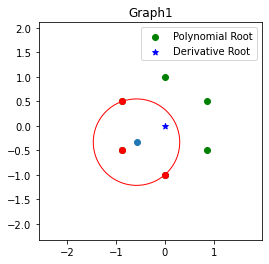

There is at least one derivative root in the centroid circle


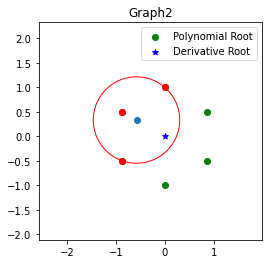

There is at least one derivative root in the centroid circle


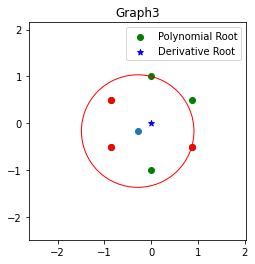

There is at least one derivative root in the centroid circle


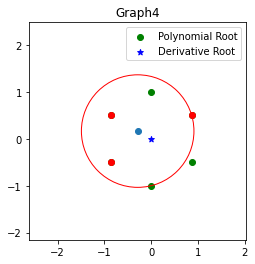

There is at least one derivative root in the centroid circle


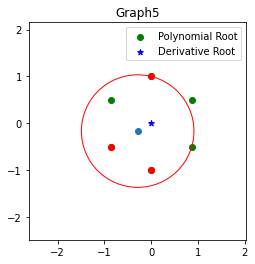

There is at least one derivative root in the centroid circle


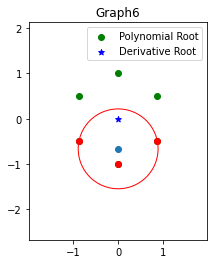

There is at least one derivative root in the centroid circle


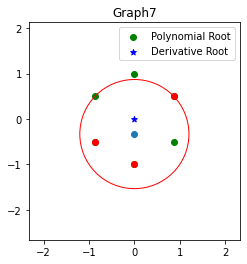

There is at least one derivative root in the centroid circle


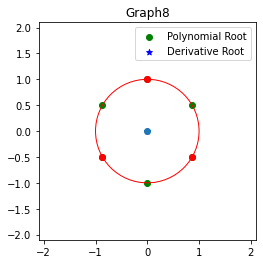

There is at least one derivative root in the centroid circle


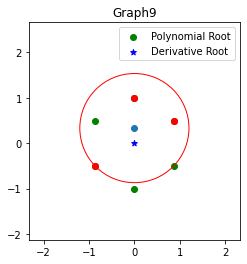

There is at least one derivative root in the centroid circle


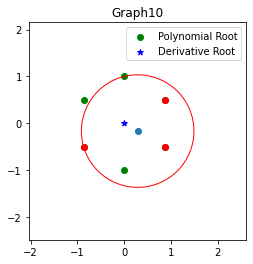

There is at least one derivative root in the centroid circle


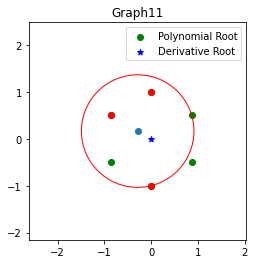

There is at least one derivative root in the centroid circle


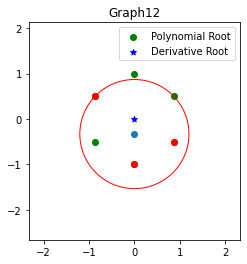

There is at least one derivative root in the centroid circle


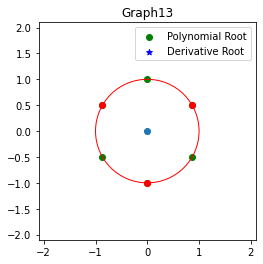

There is at least one derivative root in the centroid circle


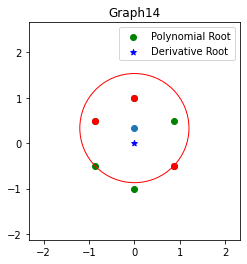

There is at least one derivative root in the centroid circle


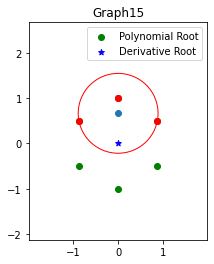

There is at least one derivative root in the centroid circle


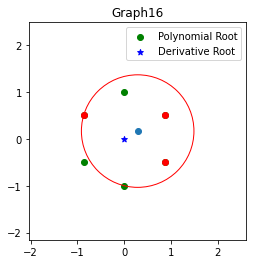

There is at least one derivative root in the centroid circle


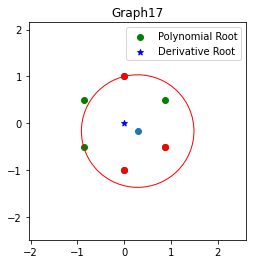

There is at least one derivative root in the centroid circle


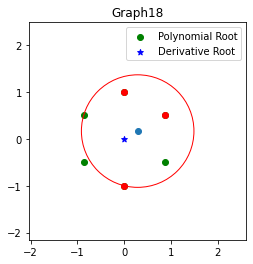

There is at least one derivative root in the centroid circle


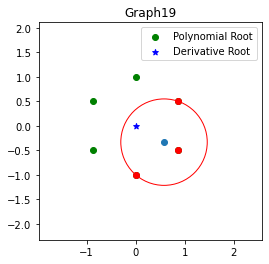

There is at least one derivative root in the centroid circle


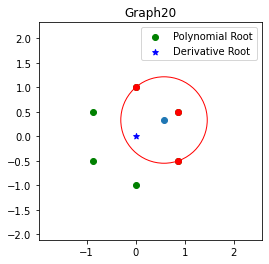

There is at least one derivative root in the centroid circle
Success rate = 100.0%


In [24]:
num_points_hull(x**6 + 1 , 3, 1000)


In [8]:
# there always exists at least one centroid circle containing at least one root
# if all roots don't have the same derivative root, then centroid always works (Omar's)
# half roots? always works?